In [103]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import time, random
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_curve,auc,mean_squared_error
import matplotlib.pyplot as plt

In [82]:
t=time.time()
one_hot_train = pd.read_csv('one_hoted_train_df.csv',sep='\t',header=0,index_col=0)
print(time.time()-t)

15.528562545776367


In [83]:
t=time.time()
one_hot_test = pd.read_csv('one_hoted_test_df.csv',sep='\t',header=0,index_col=0)
print(time.time()-t)

1.4292850494384766


In [84]:
one_hot_test = one_hot_test[list(one_hot_train.columns)]

In [85]:
for i,j in zip(list(one_hot_train),list(one_hot_test)):
    if i!=j:
        print(i,j)

In [86]:
X = one_hot_test.loc[:,one_hot_test.columns!='totals_transactionRevenue']
y = one_hot_test['totals_transactionRevenue']

In [87]:
print(len(y[y==0]),len(y[y!=0]))

81338 1033


In [88]:
gbm_class_model = joblib.load('GBM_classifier_best.sav')
gbm_regression_model = joblib.load('GBM_regressor_post_class_best.sav')
threshold_gbm_class = 0.879108024905775

In [89]:
y_test_pred = gbm_class_model.predict_proba(X)[:,1]
#y_test_pred = gbm_class_model.predict(X)

In [90]:
y_test_pred = y_test_pred>threshold_gbm_class

In [91]:
print(len(y_test_pred[y_test_pred==0]),len(y_test_pred[y_test_pred!=0]))

80925 1446


In [92]:
np.where(y_test_pred==1)[0]

array([    0,     2,     3, ..., 82198, 82239, 82316])

In [93]:
X_post_class = X.iloc[np.where(y_test_pred==1)[0]]
y_post_class = y.iloc[np.where(y_test_pred==1)[0]]

In [94]:
print(X_post_class.shape,y_post_class.shape)

(1446, 241) (1446,)


In [95]:
print(len(y_post_class[y_post_class==0]),len(y_post_class[y_post_class!=0]))

743 703


In [96]:
y_post_class = np.log(1+y_post_class)

In [97]:
y_final_pred = gbm_regression_model.predict(X_post_class)

In [98]:
mean_squared_error(y_post_class,y_final_pred)

70.01898032713898

In [99]:
prediction_array = np.zeros([len(y),])

In [100]:
prediction_array[np.where(y_test_pred==1)[0]] = y_final_pred

In [101]:
prediction_array[np.where(y_test_pred==0)[0]] = 0

In [102]:
mean_squared_error(prediction_array,np.log(1+y))

2.411707086998411

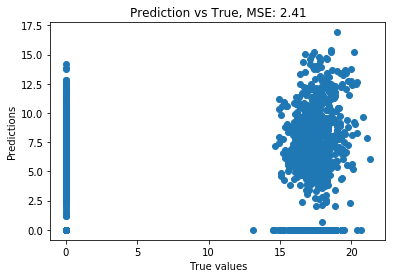

In [105]:
plt.figure()
plt.scatter(np.log(1+y),prediction_array)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.title("Prediction vs True, MSE: "+str(np.round(mean_squared_error(prediction_array,np.log(1+y)),2)))
plt.savefig('Final_gbm_regression_gbm_classification.png')

In [69]:
mean_squared_error(np.zeros([len(y),]),np.log(1+y))

3.805106612327634

In [70]:
rf_class_model = joblib.load('Random_forest_classifier_best.sav')
gbm_regression_model = joblib.load('GBM_regressor_post_class_best.sav')
threshold_rf_class = 0.5211111111111111

In [71]:
y_test_pred = rf_class_model.predict_proba(X)[:,1]
y_test_pred = y_test_pred>threshold_gbm_class

In [72]:
print(len(y_test_pred[y_test_pred==0]),len(y_test_pred[y_test_pred!=0]))

82127 244


In [73]:
X_post_class = X.iloc[np.where(y_test_pred==1)[0]]
y_post_class = y.iloc[np.where(y_test_pred==1)[0]]

In [74]:
print(X_post_class.shape,y_post_class.shape)

(244, 241) (244,)


In [75]:
print(len(y_post_class[y_post_class==0]),len(y_post_class[y_post_class!=0]))

63 181


In [76]:
y_post_class = np.log(1+y_post_class)

In [77]:
y_final_pred = gbm_regression_model.predict(X_post_class)

In [78]:
mean_squared_error(y_post_class,y_final_pred)

65.57244861353225

In [79]:
prediction_array = np.zeros([len(y),])
prediction_array[np.where(y_test_pred==1)[0]] = y_final_pred
prediction_array[np.where(y_test_pred==0)[0]] = 0

In [80]:
mean_squared_error(prediction_array,np.log(1+y))

3.297277632420468